## Implementation of ANN using Keras

In [1]:
# Import Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers

2023-08-13 07:01:02.752601: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 07:01:02.917997: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 07:01:02.918907: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 07:01:03.826950: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Check Tensorflow and Kears Version
print("Tensorflow Version: ",tf.__version__)
print("Keras Version: ",tf.keras.__version__)

Tensorflow Version:  2.12.0
Keras Version:  2.12.0


In [3]:
# Current Directory
os.getcwd()

'/home/utpal/dev/Python/PW Skills/Practise/Deep Learning'

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
# Load MNIST Dataset From Keras datasets
mnist = tf.keras.datasets.mnist
((train_images, train_labels), (test_images, test_labels)) = mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_labels.shape

(60000,)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_labels.shape

(10000,)

In [17]:
train_images[0][5,12]

3

In [16]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [14]:
type(train_images[0])

numpy.ndarray

In [15]:
train_images[0].ndim

2

In [10]:
# Scaling the data
train_images, test_images = train_images/255, test_images/255

In [11]:
# Train, Test and Validation Split of the Dataset
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.20, random_state=42, shuffle=True)

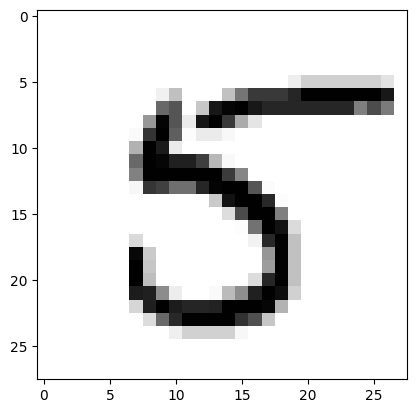

In [12]:
# Show a single Image
plt.imshow(train_images[0], cmap='binary')
plt.show()

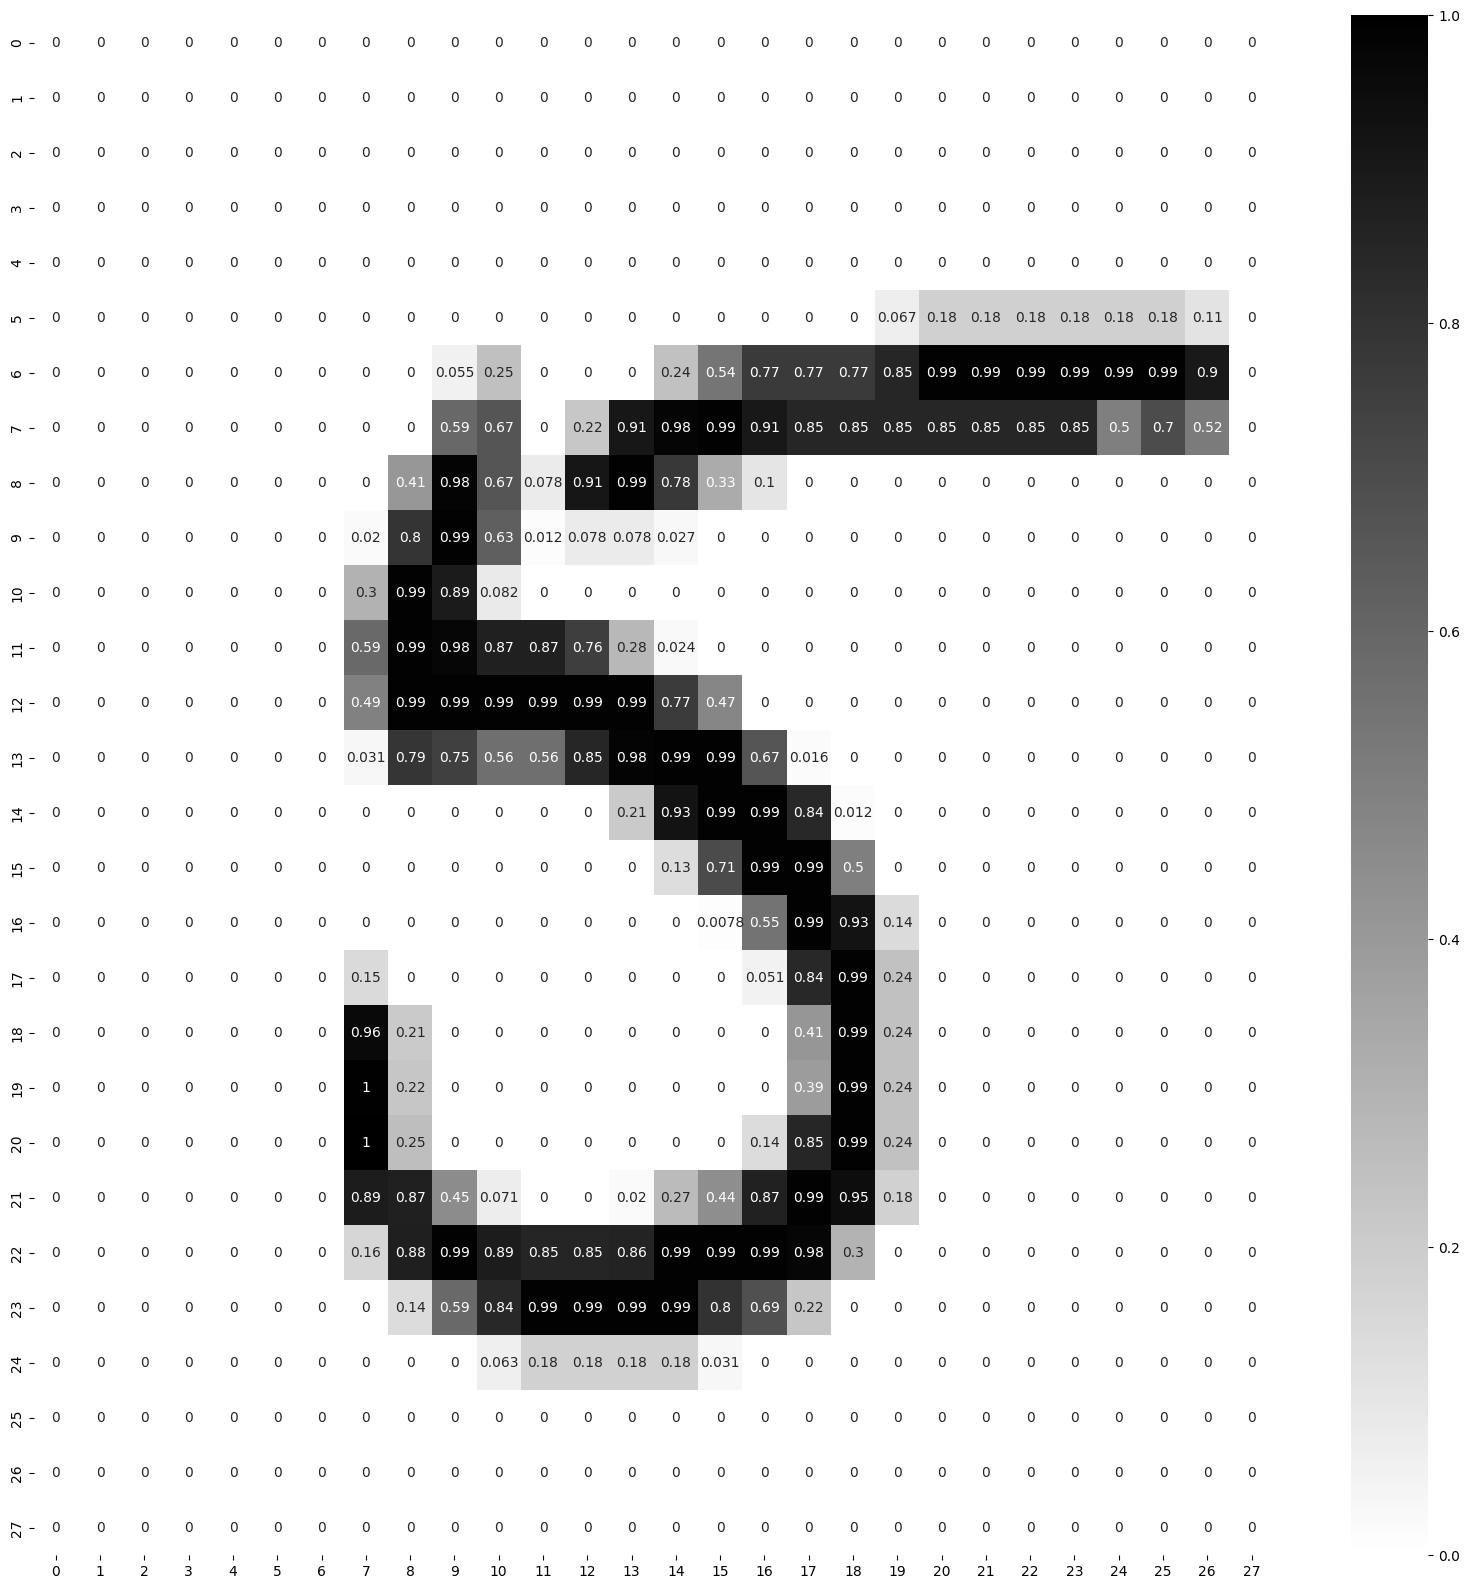

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(train_images[0], cmap='binary', annot=True)
plt.show()

In [62]:
layers = [
    tf.keras.layers.Flatten(input_shape=[28,28], name='inputLayer'),
    tf.keras.layers.Dense(300, activation='relu', name='hiddenLayer1', kernel_regularizer=regularizers.L1(1e-4), kernel_initializer=tf.keras.initializers.GlorotNormal()),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu', name='hiddenLayer2', bias_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), kernel_initializer=tf.keras.initializers.GlorotNormal()),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax', name='outputLayer')
]

model_clf = tf.keras.models.Sequential(layers)

In [63]:
model_clf.layers

In [64]:
model_clf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_3 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                      

In [65]:
# Access the hidden Layers
hiden_layer = model_clf.layers

In [66]:
hiden_layer

In [67]:
hiden_layer[0].name

'inputLayer'

In [68]:
weights, biases = hiden_layer[1].get_weights()

In [69]:
weights

array([[-2.5524389e-02, -9.1805898e-02,  3.2527152e-02, ...,
         3.7174840e-02,  2.7267914e-02, -2.6402494e-02],
       [-3.2602362e-05,  1.4307855e-02,  1.8011013e-02, ...,
         1.6706993e-04,  3.3296201e-02,  2.8204458e-02],
       [ 2.8533222e-02,  2.5767032e-02, -1.4535557e-02, ...,
        -5.1117636e-02,  5.8491591e-02, -1.6301380e-02],
       ...,
       [ 2.1242229e-02, -1.2429348e-02, -4.5057926e-02, ...,
         5.5784184e-02, -3.3326630e-02, -9.5094908e-03],
       [-5.3792059e-02,  1.2983233e-02,  2.2052126e-02, ...,
        -3.6866419e-02,  3.9580792e-02,  3.3609021e-02],
       [-2.8283149e-02,  3.5867993e-02, -3.6374573e-02, ...,
        -3.2712743e-02, -1.1412243e-03,  3.5373230e-02]], dtype=float32)

In [70]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [71]:
train_images.shape

(48000, 28, 28)

In [72]:
# Compile The Model

loss_function = 'sparse_categorical_crossentropy'
optimizer = 'SGD'
metrics = ['accuracy']

model_clf.compile(loss=loss_function, optimizer=optimizer, metrics=metrics)


In [73]:
train_images.shape

(48000, 28, 28)

In [74]:
train_labels.shape

(48000,)

## Callback Functions

In [75]:
# Tensorboard Callback Functions

log_folder = 'logs' # Folder to save the logs

# Remove previous logs
!rm -rf logs
tb_cb = TensorBoard(log_folder, histogram_freq=1)

In [76]:
# Early Stoping Callback
early_stoping_cb = EarlyStopping(patience=5, monitor='loss', min_delta=0.01, restore_best_weights=True, verbose=1)

In [77]:
# Model Checkpoint Callback
checkpoint_filepath = 'artifacts/Model_check.h5'
model_cp_cb = ModelCheckpoint(checkpoint_filepath, save_best_only=True, save_weights_only=False)

In [78]:
# Train the model

validation_set = (validation_images, validation_labels)
history = model_clf.fit(train_images, train_labels, epochs=10, batch_size=30, validation_data=validation_set, callbacks=[tb_cb, early_stoping_cb, model_cp_cb], verbose=1)

Epoch 1/10
1600/1600 [==============================] - 6s 3ms/step - loss: 1.2286 - accuracy: 0.8767 - val_loss: 0.9791 - val_accuracy: 0.9466
Epoch 2/10
1600/1600 [==============================] - 5s 3ms/step - loss: 0.9867 - accuracy: 0.9381 - val_loss: 0.8982 - val_accuracy: 0.9596
Epoch 3/10
1600/1600 [==============================] - 6s 3ms/step - loss: 0.9022 - accuracy: 0.9532 - val_loss: 0.8418 - val_accuracy: 0.9648
Epoch 4/10
1600/1600 [==============================] - 6s 3ms/step - loss: 0.8388 - accuracy: 0.9622 - val_loss: 0.7974 - val_accuracy: 0.9688
Epoch 5/10
1600/1600 [==============================] - 6s 3ms/step - loss: 0.7883 - accuracy: 0.9672 - val_loss: 0.7566 - val_accuracy: 0.9708
Epoch 6/10
1600/1600 [==============================] - 6s 3ms/step - loss: 0.7426 - accuracy: 0.9712 - val_loss: 0.7214 - val_accuracy: 0.9732
Epoch 7/10
1600/1600 [==============================] - 6s 3ms/step - loss: 0.7021 - accuracy: 0.9743 - val_loss: 0.6856 - val_accuracy:

In [31]:
# Tensorboard Visualization

In [88]:
%reload_ext tensorboard

In [89]:
%tensorboard --logdir="logs"

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-08-11 08:53:54.104110: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Traceback (most recent call last):
  File "/home/utpal/.local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/home/utpal/.local/lib/python3.10/site-packages/tensorboard/main.py", line 46, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/home/utpal/.local/lib/python3.10/site-packages/absl/app.py", line 312, in run
    _run_main(main, args)
  File "/home/utpal/.local/lib/python3.10/site-packages/absl/app.py", line 258, in _run_main
    sys.exit(main(argv))
  File "/home/utpal/.local/lib/python3.10/site-packages/tensorboard/program.py", line 27

In [36]:
# Show the params of the train model
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1600}

In [79]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.228609,0.876667,0.979129,0.946583
1,0.986688,0.938146,0.898222,0.959583
2,0.902227,0.953188,0.841796,0.964833
3,0.838772,0.962167,0.797378,0.968750
4,0.788326,0.967167,0.756589,0.970833
5,0.742631,0.971167,0.721441,0.973250
6,0.702055,0.974250,0.685586,0.974833
7,0.663642,0.977396,0.654996,0.976167
8,0.629936,0.978854,0.628160,0.976583
9,0.596663,0.981208,0.601441,0.975917


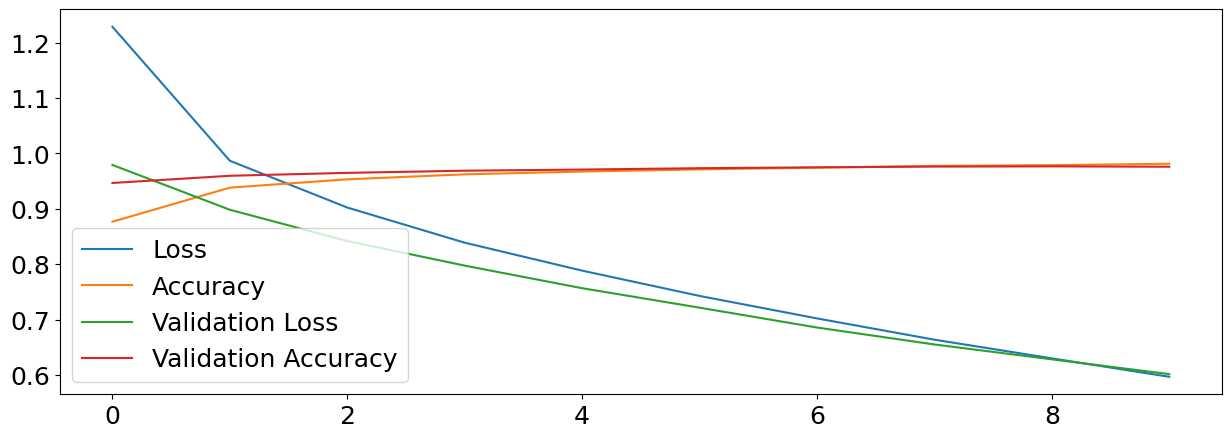

In [80]:
# Plot the loss and accuracy from the history
plt.figure(figsize=(15,5))
plt.plot(pd.DataFrame(history.history))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(['Loss','Accuracy','Validation Loss','Validation Accuracy'], fontsize=18)
plt.show()

In [81]:
# Evaluate the model 
model_clf.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5992 - accuracy: 0.9760


[0.5991986989974976, 0.9760000109672546]

In [82]:
# Predict the Model
x_actual = train_images[0:2]
y_actual = train_labels[0:2]

y_predict = model_clf.predict(x_actual)

1/1 [==============================] - 0s 58ms/step


In [83]:
y_predict # Here we get probalilities for all of the outputs

array([[4.5019684e-07, 8.0895359e-07, 4.4043537e-07, 4.5366569e-06,
        2.5995018e-08, 9.9997878e-01, 2.3446769e-06, 3.3472880e-08,
        1.2314437e-05, 3.4394270e-07],
       [9.9698335e-01, 7.7929963e-06, 7.6434074e-04, 1.4184435e-05,
        5.0001495e-07, 2.1631580e-03, 9.9608369e-06, 5.5065575e-05,
        7.8219563e-07, 9.0558967e-07]], dtype=float32)

In [84]:
y_pred = np.argmax(y_predict, axis=-1)
y_pred

array([5, 0])

In [85]:
y_actual

array([5, 0], dtype=uint8)

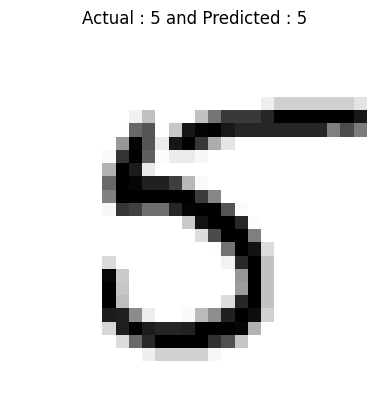

----------------------------------------------------------------------------------------------------


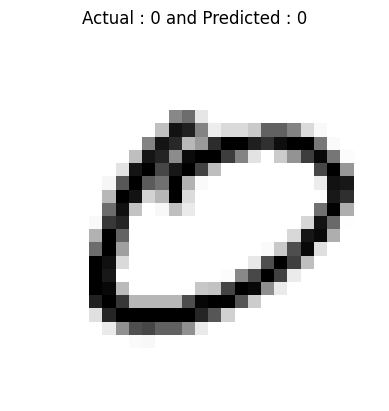

----------------------------------------------------------------------------------------------------


In [86]:
ziped_values = list(zip(x_actual, y_actual, y_pred))

for image, actual, predicted in ziped_values:
    plt.title(f"Actual : {actual} and Predicted : {predicted}")
    plt.imshow(image, cmap='binary')
    plt.axis("off")
    plt.show()
    print("-" * 100)

In [87]:
# Loading the Checkpoint Model Weights
# If I just save the weights, than I have to compile the model first and then load the weights and finally we have to fit the Model
# If I save the model than I don't need to train the model, just load and predict

ckp_model = tf.keras.models.load_model(checkpoint_filepath)

In [44]:
ckp_model

In [45]:
# Predict from the checkpoint model
x_actual = train_images[4:6]
y_actual = train_labels[4:6]
y_actual

array([1, 3], dtype=uint8)

In [46]:
# If we dont
y_prob = ckp_model.predict(x_actual)
y_prob

1/1 [==============================] - 0s 57ms/step


array([[2.2037784e-07, 9.9988616e-01, 1.0720272e-05, 2.2185134e-06,
        3.9151877e-07, 2.4355739e-07, 5.1990905e-06, 4.0683066e-05,
        5.3769651e-05, 3.3380061e-07],
       [4.1541703e-06, 1.2467457e-04, 2.9075693e-04, 9.8037922e-01,
        1.3233175e-05, 5.1286427e-04, 5.8886844e-06, 2.7217238e-05,
        3.6561897e-04, 1.8276347e-02]], dtype=float32)

In [47]:
y_pred = np.argmax(y_prob, axis=-1)
y_pred

array([1, 3])

In [48]:
model_clf.save('artifacts/mnist_model.h5')